In [93]:
import pandas as pd
import numpy as np

In [157]:
SCENARIO_NUMBER = 2
options = {
    0:(5.0,'put'),
    1:(5.5,'put'),
    2:(6.0,'put'),
    3:(6.5,'put'),
    4:(7.0,'put'),
    5:(7.5,'put'),
    6:(8.0,'put'),
    7:(5.0,'call'),
    8:(5.5,'call'),
    9:(6.0,'call'),
    10:(6.5,'call'),
    11:(7.0,'call'),
    12:(7.5,'call'),
    13:(8.0,'call'),
}
scenario = pd.read_csv('104/Scenario'+ str(SCENARIO_NUMBER) +'.csv')
prices = pd.read_csv('104/option_prices_scenario_'+ str(SCENARIO_NUMBER) + '.csv')
prices_list = prices['Price [USD]'].to_list()
scenario_list = scenario.to_dict(orient='list')

In [158]:
scenario['total'] = scenario['yield [thousands of bushels]'] * scenario['price [$/bushel]'] * 1000

<Axes: ylabel='Frequency'>

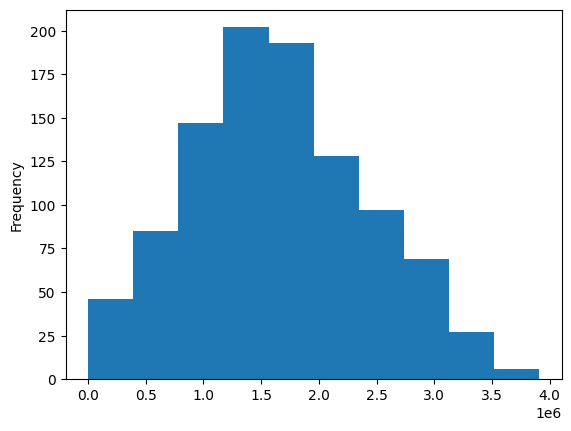

In [159]:
scenario['total'].plot.hist()

In [160]:
def calculate_profit(strike, market_price, typ):
    if typ == 'call':
        return max(100 * (market_price - strike), 0.0)
    return max(100 * (strike - market_price), 0.0)


In [161]:
def profit(option_prices, yi, market_price, strategy):
    res = yi * market_price * 1000
    before_options = res
    for i in range(14):
        strike, typ = options[i]
        res += strategy[i] * calculate_profit(strike, market_price, typ)
        res -= option_prices[i] * strategy[i]
    return res

In [162]:
def get_incomes_of_strategy(strategy, market_prices, yields, option_prices, return_quantiles=False):
    profits = []
    for i in range(1000):
        curr_profit = profit(option_prices, yields[i], market_prices[i], strategy)
        profits.append(curr_profit)
    return profits

In [147]:
# strat = [256.0, 136.0, 332.0, 622.0, 1221.0, 180.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   # 1
# strat = [328.0, 300.0, 448.0, 508.0, 232.0, 736.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  # 2
strat = [145.0, 387.0, 537.0, 1090.0, 267.0, 256.0, 237.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] # 4

In [148]:
total_options = get_incomes_of_strategy(strat, scenario_list['price [$/bushel]'], scenario_list['yield [thousands of bushels]'], prices_list,)

In [149]:
scenario['expected_income_options'] = total_options

<Axes: ylabel='Frequency'>

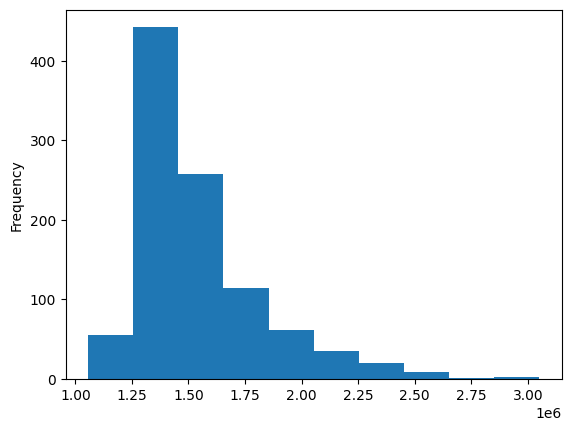

In [150]:
scenario['expected_income_options'].plot.hist()

<Axes: ylabel='Frequency'>

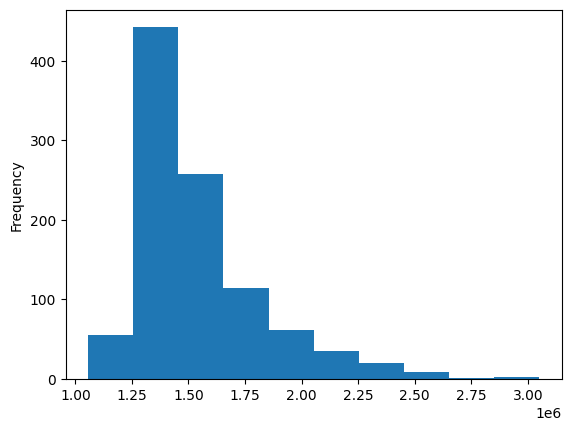

In [151]:
scenario['expected_income_options'].plot.hist()

<Axes: ylabel='Frequency'>

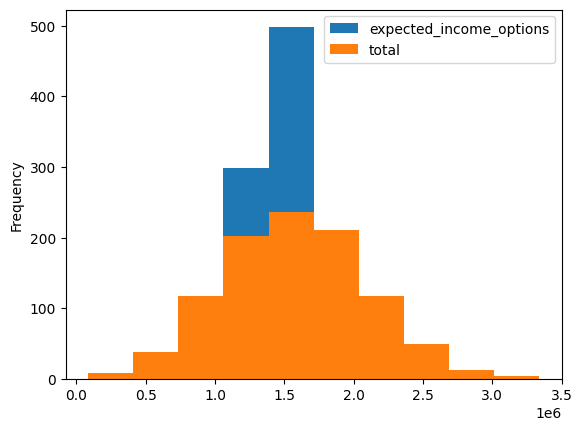

In [152]:
scenario[['expected_income_options', 'total']].plot.hist()

<Axes: ylabel='Frequency'>

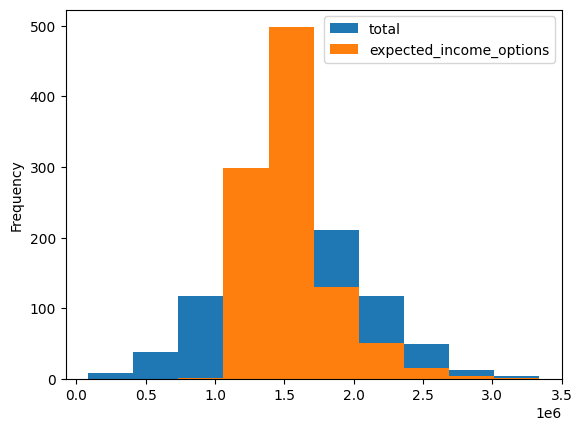

In [153]:
scenario[['total', 'expected_income_options']].plot.hist()

In [154]:
scenario.mean()

yield [thousands of bushels]    2.446575e+02
price [$/bushel]                6.437499e+00
total                           1.574438e+06
expected_income_options         1.548189e+06
dtype: float64

In [155]:
scenario.std()

yield [thousands of bushels]        14.401085
price [$/bushel]                     2.080093
total                           515786.352246
expected_income_options         282566.817106
dtype: float64

In [156]:
scenario.to_csv('expected_income' + str(SCENARIO_NUMBER) + '.csv' )

In [111]:
from matplotlib import pyplot

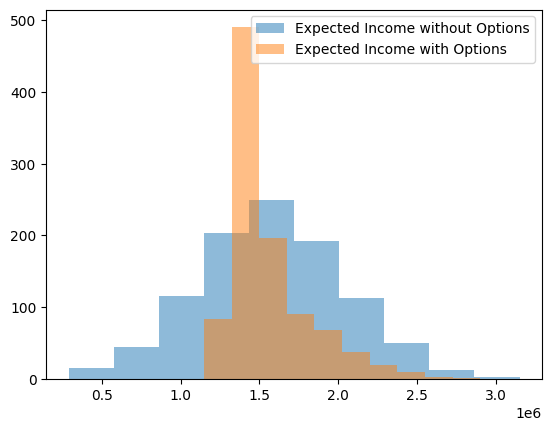

In [113]:
pyplot.hist(scenario['total'], alpha=0.5, label='Expected Income without Options')
pyplot.hist(scenario['expected_income_options'], alpha=0.5, label='Expected Income with Options')
pyplot.legend(loc='upper right')
pyplot.show()